In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


**LIBRARIES**

In [2]:
#importing libraries

import pandas as pd
pd.pandas.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

**DATASET**

In [3]:
df = "/kaggle/input/mall-customers/Mall_Customers.csv"
df = pd.read_csv(df)

**EDA**

In [4]:
df.head() 


#gender word derived from french word Genre, so worries

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#basic EDA (insights)

def df_ops(df):
    print(df.shape)
    print(df.head())
    print(df.info())
    print(df.describe())
    print(df.isnull().sum())

df_ops(df)

(200, 5)
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Inco

In [6]:
df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

In [7]:
df.isnull().sum() #no missing values in the dataset

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
#checking basic stats for Age
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

<Axes: ylabel='Density'>

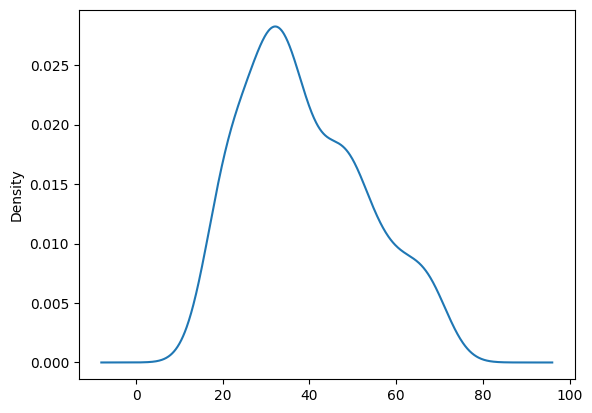

In [9]:
#plotting kde to check skewness of Age 
df['Age'].plot(kind = "kde")

In [10]:
#most of the people is from the age group 20- 60 
#with majority from around 30 

<Axes: ylabel='Frequency'>

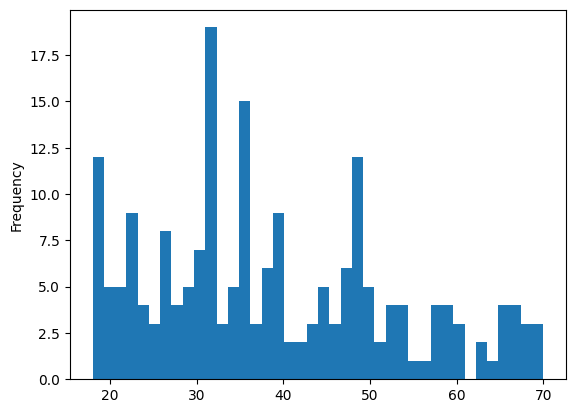

In [11]:
#plotting hist to check skewness of Age
df['Age'].plot(kind = "hist", bins = 40) 

#hist makes it easy to interpret

In [12]:
#skewness 
df['Age'].skew() #little rightly skewed 

0.48556885096681657

<Axes: >

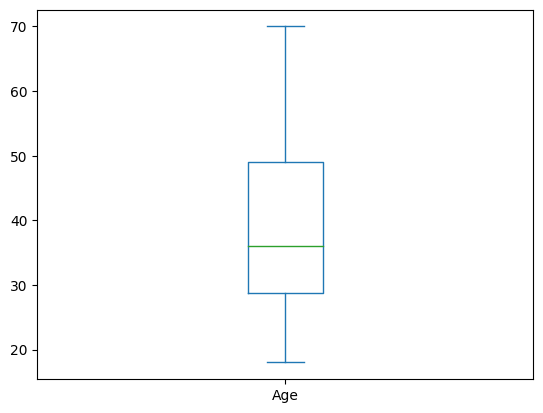

In [13]:
#boxplot to see outliers 
df['Age'].plot(kind = "box")

#no outliers

In [14]:
#checking basic stats for Annual Income(k$)	
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

<Axes: ylabel='Density'>

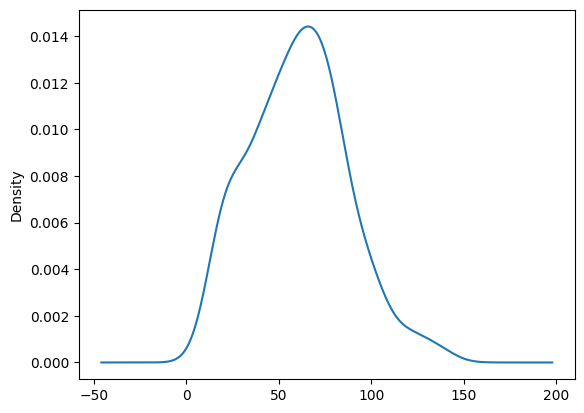

In [15]:
#plotting kde to check skewness of Annual Income(k$)	
df['Annual Income (k$)'].plot(kind = "kde")


#avg annual income seems to be around 70 

<Axes: ylabel='Frequency'>

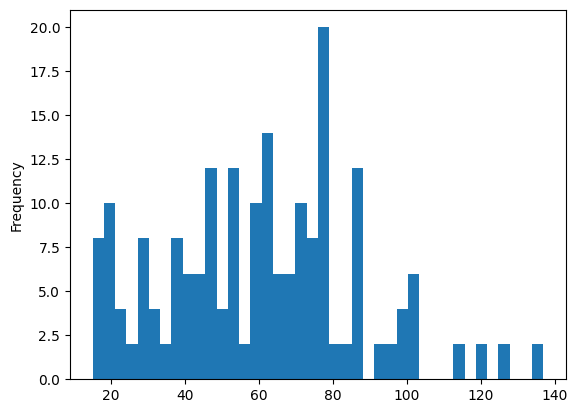

In [16]:
#plotting hist to check skewness of Annual Income(k$)
df['Annual Income (k$)'].plot(kind = "hist", bins = 40) 


#seems to be around 75

In [17]:
#skewness 
df['Annual Income (k$)'].skew() #near to normal  

0.3218425498619055

<Axes: >

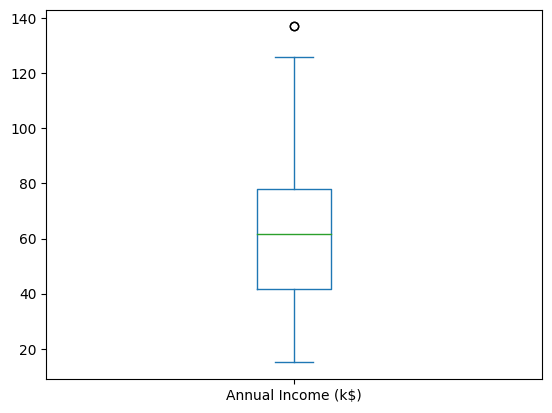

In [18]:
#boxplot to see outliers 
df['Annual Income (k$)'].plot(kind = "box")

#little outlier detected

In [19]:
#are the outliers part of the data
df[df['Annual Income (k$)'] > 130]


#two out;iers 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


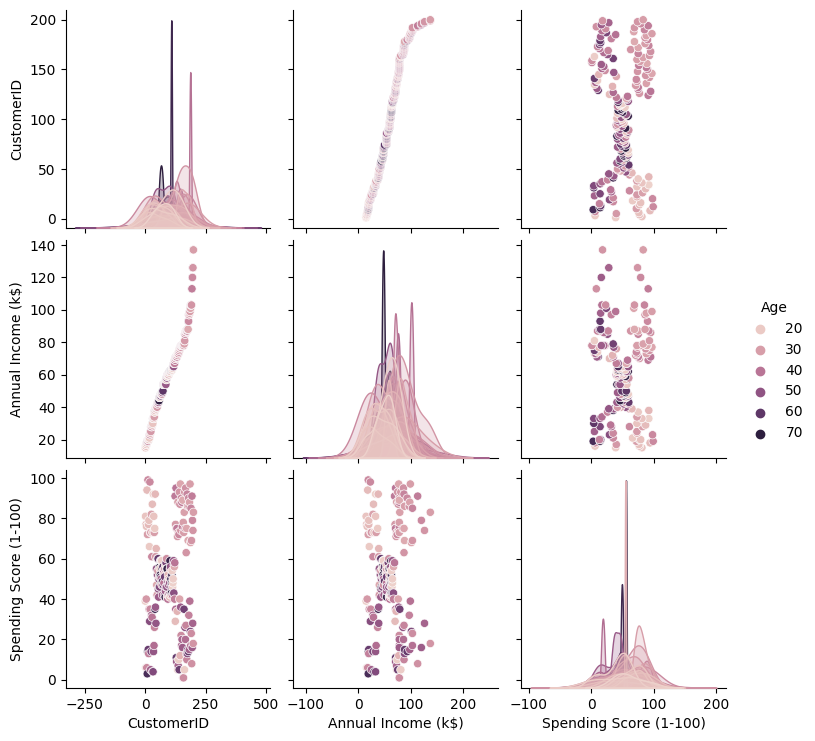

In [20]:
#pairplot against Age

sns.pairplot(df, hue = 'Age')

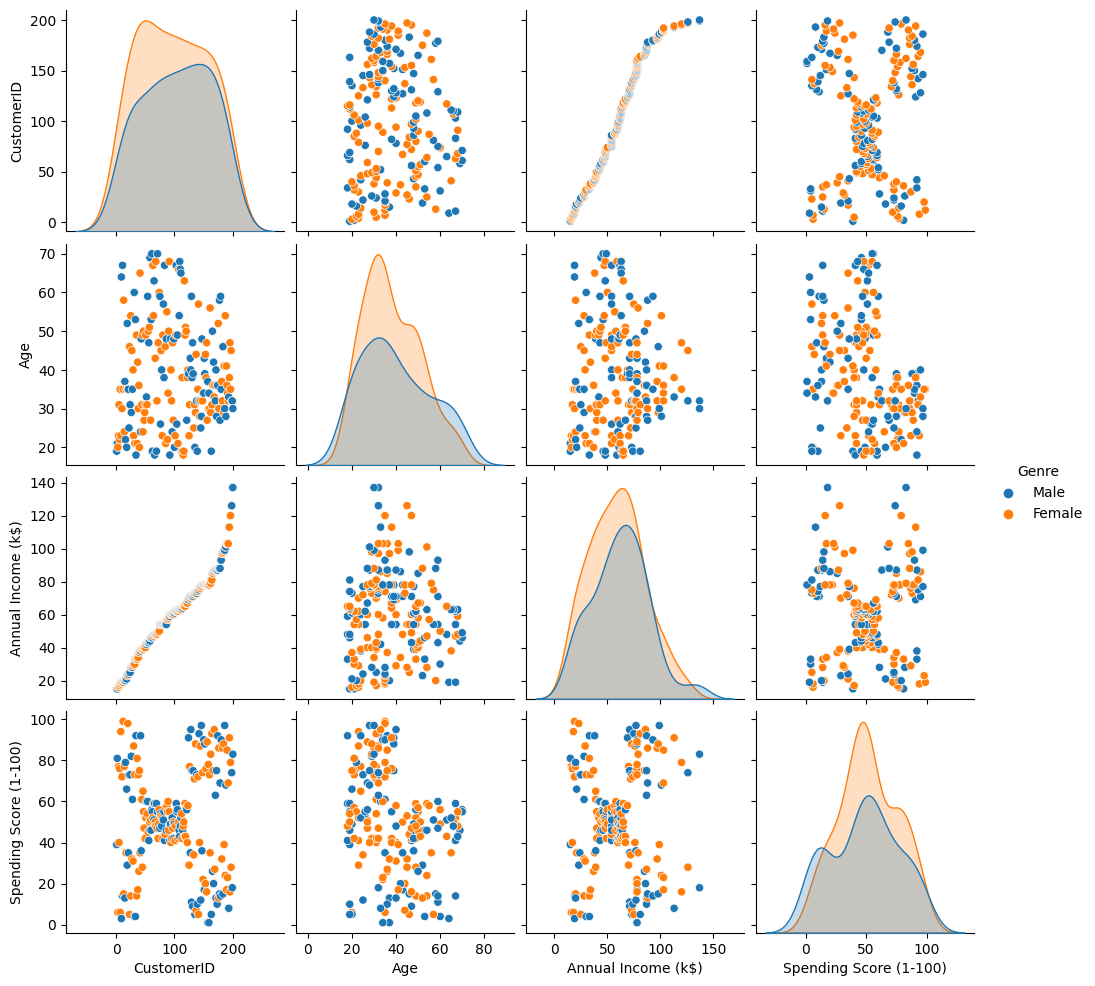

In [21]:
#pairplot against Gender

sns.pairplot(df, hue = 'Genre')

**FE**

In [22]:
#replaceing gender with numbers categorical --> numerical without OHE

sex_mapping = {"Male": 0, "Female": 1}  
df["Genre"] = df["Genre"].replace(sex_mapping)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


<Axes: >

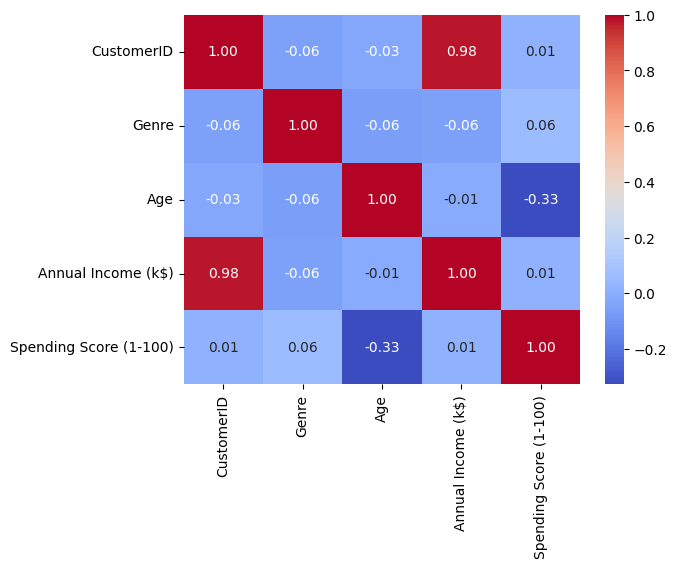

In [23]:
#heatmap for dataset

sns.heatmap(data = df.corr() , annot = True , fmt = '.2f' , cmap = 'coolwarm')

**MODEL SELECTION & MODEL DEVELOPMENT**

In [24]:
#scaling our data for good performance 


scaler = StandardScaler()
Scaler = scaler.fit_transform(df)

In [25]:
#scaling our data for good performance 


Scaling = StandardScaler()
Scaled_df = Scaling.fit_transform(df)

In [26]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [27]:
#PCA for dimensionality reduction


Pca = PCA(n_components = 2)
PCA_df = Pca.fit_transform(Scaled_df)
print("Featues now:",PCA_df.shape)

Featues now: (200, 2)


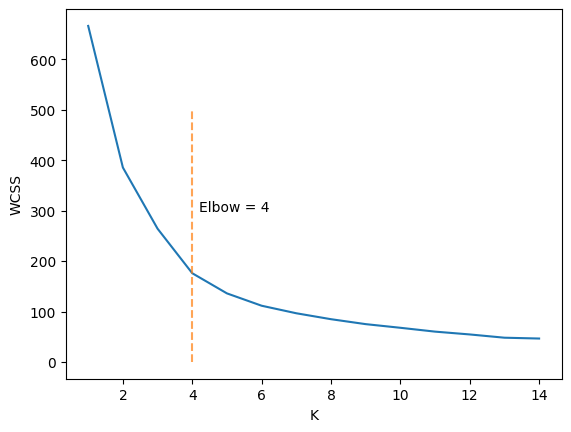

In [28]:
#k-means clustering 
#elbow plot (WCSS = Within Cluster Sum of Squares)


wcss_list = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i , init = 'k-means++'  , random_state = 1)
    kmeans.fit(PCA_df) 
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1,15) , wcss_list)
plt.plot([4,4] , [0 , 500] , linestyle = '--' , alpha = 0.7)
plt.text(4.2 , 300 , 'Elbow = 4')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()


In [29]:
kmeans = KMeans(n_clusters = 4 , init = 'k-means++'  , random_state = 1)
kmeans.fit(PCA_df)
clu1 = kmeans.predict(PCA_df)
res_df = pd.DataFrame()
res_df['PC1'] = PCA_df[:,0]
res_df['PC2'] = PCA_df[:,1]
res_df['CLU1'] = clu1

In [30]:
res_df.head()

,PC1,PC2,CLU1
0,-2.316965,-0.454190,0
1,-2.272391,-1.474104,0
2,-2.454223,-0.006922,0
3,-2.386461,-1.749935,0
4,-2.397377,-0.369341,0


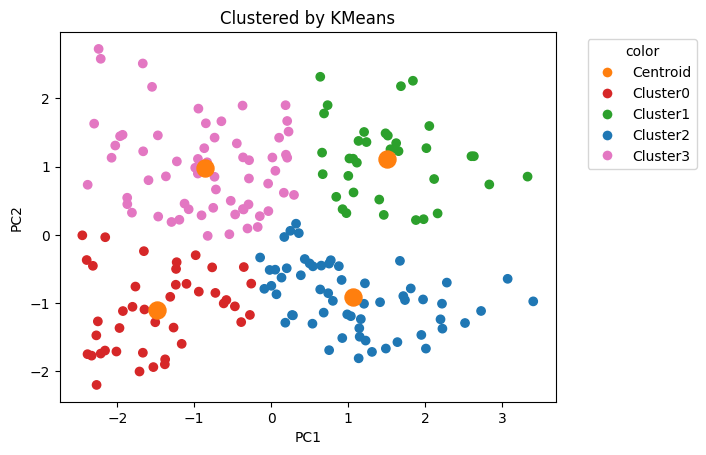

In [31]:
cluster_colors = {0:'tab:red' , 1:'tab:green' , 2:'tab:blue' , 3:'tab:pink'}
cluster_dict = {'Centroid':'tab:orange','Cluster0':'tab:red' , 'Cluster1':'tab:green'
                , 'Cluster2':'tab:blue' , 'Cluster3':'tab:pink'}


plt.scatter(x = res_df['PC1'] , y = res_df['PC2'] 
                , c = res_df['CLU1'].map(cluster_colors))
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in cluster_dict.items()]
plt.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.scatter(x = kmeans.cluster_centers_[:,0] , y = kmeans.cluster_centers_[:,1] , marker = 'o' , c = 'tab:orange'
            , s = 150 , alpha = 1)

plt.title("Clustered by KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

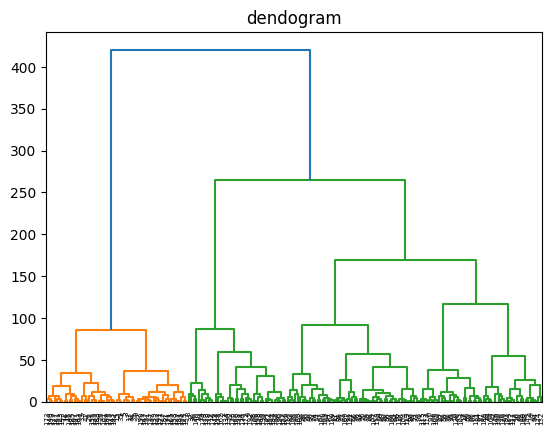

In [32]:
#dendogram


X = df.iloc[:,[2,4]].values
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('dendogram')
plt.show()

In [33]:
#Aggloerative clustering 


agglo_clu = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agglo_clu.fit(X)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [34]:
silhouette_avg = silhouette_score(X, agglo_clu.labels_)
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_avg}")

Silhouette Score for Agglomerative Clustering: 0.40374071753059787


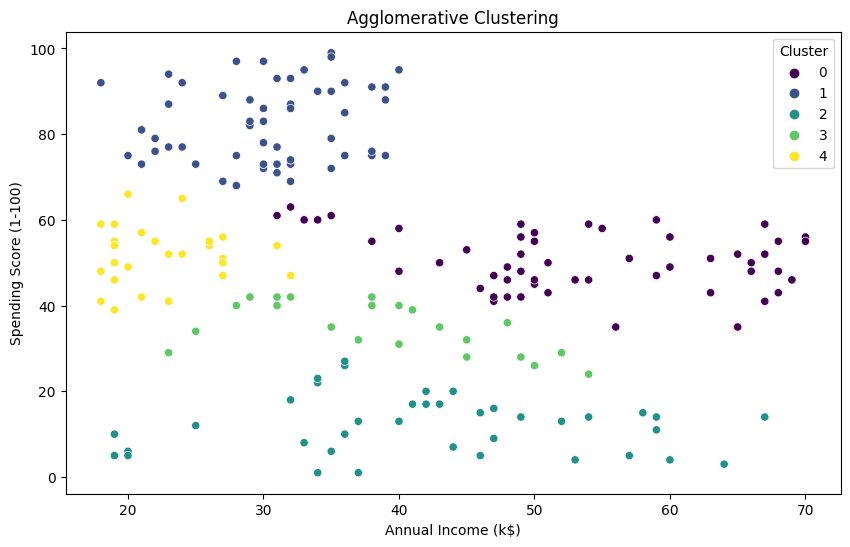

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=agglo_clu.labels_, palette='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [36]:
#silhouette score is low

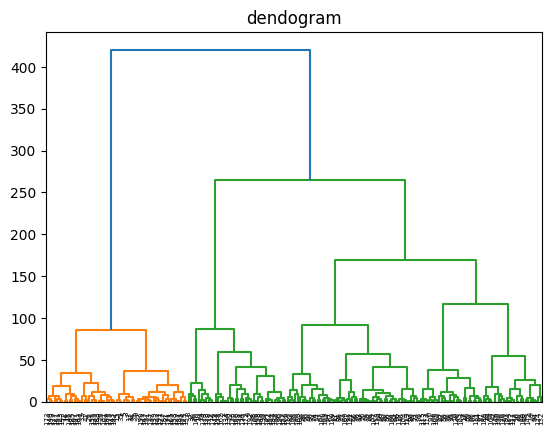

In [37]:
Y = res_df.iloc[:,[0,2]].values
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('dendogram')
plt.show()

In [38]:
agglo_clu = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agglo_clu.fit(Y)



AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [39]:
silhouette_avg = silhouette_score(Y, agglo_clu.labels_)
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_avg}")

Silhouette Score for Agglomerative Clustering: 0.49149518028726297


In [40]:
#this is little good
#keep evaluating this...